In [161]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition, datasets
import matplotlib.pyplot as plt
from package import function
import shap
%matplotlib inline

In [138]:
Xtrain = pd.read_csv("Xtrain.csv")
ytrain = pd.read_csv("ytrain.csv").cardio
Xtest = pd.read_csv("Xtest.csv")
ytest = pd.read_csv("ytest.csv").cardio

The score is 0.631143 for Decision Tree baseline


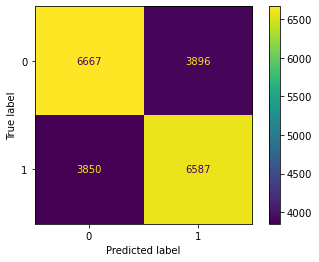

In [139]:
dt_baseline = DecisionTreeClassifier(random_state = 100)
dt_baseline.fit(Xtrain,ytrain)
y_pred = dt_baseline.predict(Xtest)
probTest = dt_baseline.predict_proba(Xtest)
probTest = probTest[:,1]
function.eval_confusion("Decision Tree baseline",dt_baseline.score(Xtest,ytest),y_pred,ytest)

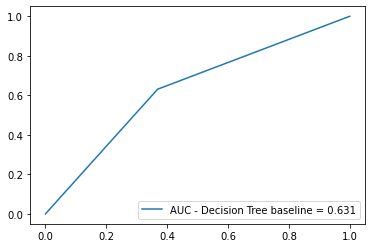

In [140]:
function.eval_auc("Decision Tree baseline accuracy score is ",ytest,probTest)

In [141]:
std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()

In [142]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                        ('pca', pca),
                        ('dec_tree', dec_tree)])

In [143]:
n_components = list(range(1,Xtrain.shape[1]+1,1))

In [144]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

In [145]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(Xtrain, ytrain)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11]})

In [146]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); 
print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: entropy
Best max_depth: 10
Best Number Of Components: 6

DecisionTreeClassifier(criterion='entropy', max_depth=10)


The score is 0.727286 for Decision Tree final


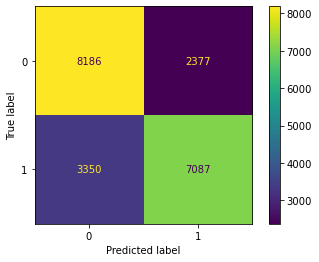

In [147]:
dt_final = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10,random_state = 100)
dt_final.fit(Xtrain,ytrain)
y_pred = dt_final.predict(Xtest)
probTest = dt_final.predict_proba(Xtest)
probTest = probTest[:,1]
function.eval_confusion("Decision Tree final accuracy score is ",dt_final.score(Xtest,ytest),y_pred,ytest)

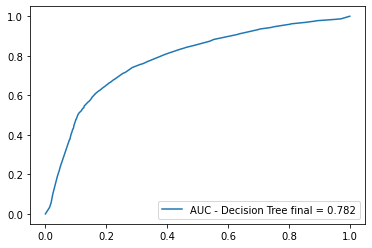

In [148]:
function.eval_auc("Decision Tree final",ytest,probTest)

In [152]:
dt_final.feature_importances_

array([0.16730598, 0.03014652, 0.0469409 , 0.63861614, 0.02154511,
       0.00335324, 0.06594596, 0.01095561, 0.00381799, 0.0022264 ,
       0.00914615])

In [162]:
explainer = shap.TreeExplainer(dt_final)
shap_values = explainer.shap_values(Xtest)

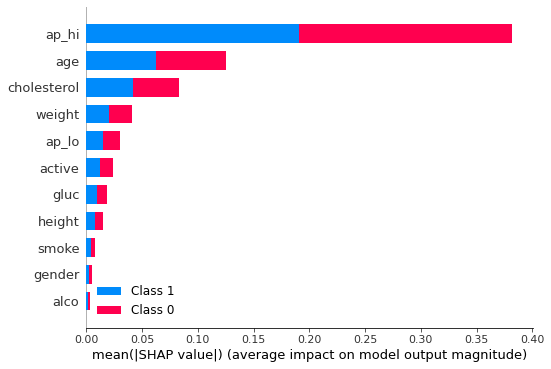

In [163]:
shap.summary_plot(shap_values, Xtest, plot_type="bar")